# Clustering

### Applications:
• For **recommendation systems**: you can cluster your customers based on their pur‐
chases, their activity on your website, and so on. 

• For **data analysis**: when analyzing a new dataset, it is often useful to first discover
clusters of similar instances, as it is often easier to analyze clusters separately.

• As a **dimensionality reduction** technique: once a dataset has been clustered, it is
usually possible to measure each instance’s anity with each cluster (affinity is
any measure of how well an instance fits into a cluster). Each instance’s feature
vector x can then be replaced with the vector of its cluster affinities. If there are k
clusters, then this vector is k dimensional. This is typically much lower dimen‐
sional than the original feature vector, but it can preserve enough information for
further processing.

• For **anomaly detection** (also called outlier detection): any instance that has a low
affinity to all the clusters is likely to be an anomaly. 

• For **semi-supervised learning**: if you only have a few labels, you could perform
clustering and propagate the labels to all the instances in the same cluster. 

# K-Means

## The K-Means Algorithm:
- Initialize the cluster's centers randomly
- Assign each training instance to a cluster (min distance between instance and all clusters)
- Update cluster's center to the mean of all assigned instances
- Repeat until the centers stop moving (moves < epsilon)

## Choose Clusters centers
a good initial position for the centers will produce better results
run K-Means several times then chose the best of them based on (**inertia** evaluation)

**inertia**: this is the mean squared distance between each instance and its closest centroid

## Choose number of Clusters K
**sil‐houette score**: which is the mean silhouette coefcient over all the instances. An instan‐
ce’s silhouette coefficient is equal to (b – a) / max(a, b) where a is the mean distance
to the other instances in the same cluster (it is the mean intra-cluster distance), and b
is the mean nearest-cluster distance, that is the mean distance to the instances of the
next closest cluster 

The silhouette coefficient range = **[-1, +1]**: 

- close to +1: means that the instance is well inside its own cluster and far from other clusters,
- close to 0 : means that it is close to a cluster boundary
- close to -1: means that the instance may have been assigned to the wrong cluster

compute that for different values for k and select the heighst

## Limitations
K-Means does not behave very well when the clusters have varying sizes,
different densities, or non-spherical shapes(for ex: elipse shape data in 2D features).

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [10]:
# unlabeled data 
blob_centers = np.array(
    [[ 0.2,  2.4],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, n_features=2, centers=blob_centers, cluster_std=blob_std)

In [11]:
X.shape, X[5:10], y[5:10]

((2000, 2),
 array([[-1.61438803,  2.20749484],
        [ 0.44754267,  2.38145998],
        [-2.90170158,  1.38599796],
        [-2.86078015,  1.60132847],
        [-2.77704804,  1.77890855]]),
 array([1, 0, 4, 2, 2]))

Text(0, 0.5, 'x2')

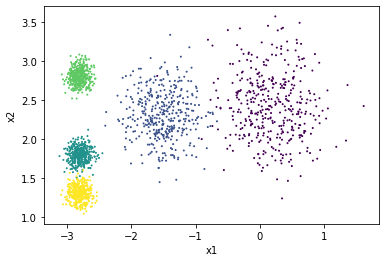

In [12]:
%matplotlib inline
plt.scatter(x=X[:,0], y=X[:,1], s=1, c=y)
plt.xlabel("x1")
plt.ylabel("x2")

In [13]:
from sklearn.cluster import KMeans
# k clusters
k = 5
# kmeans apply the algorithm 10 times(generate centers randomly 10 times) and select the best according to inertia
# if you know good initial centers positions, use good_init parameter
num_kmeans_trails = 10
kmeans = KMeans(n_clusters=k, n_init=num_kmeans_trails)

In [14]:
kmeans.fit(X)

KMeans(n_clusters=5)

In [15]:
kmeans.inertia_

228.73540238288354

In [16]:
kmeans.labels_

array([1, 2, 2, ..., 3, 4, 0], dtype=int32)

In [17]:
kmeans.labels_.shape

(2000,)

In [18]:
kmeans.cluster_centers_

array([[-1.47377718,  2.3093518 ],
       [-2.79109756,  1.79300202],
       [ 0.20208689,  2.41537177],
       [-2.79603364,  2.79660877],
       [-2.79936273,  1.29977316]])

In [19]:
def plot(clusterer):
    global X
    global y
    centroids = clusterer.cluster_centers_
    # plot centers
    plt.scatter(centroids[:, 0], centroids[:, 1],marker='o', s=35, linewidths=8,color="red",zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=2, linewidths=12, color="black", zorder=11)

    # plot contours around clusters
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 1000),
                         np.linspace(mins[1], maxs[1], 1000))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # plot boundaries
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    # plot data
    plt.scatter(x=X[:,0], y=X[:,1], s=1, c=y)

    

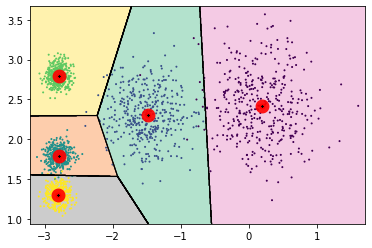

In [20]:
plot(kmeans)

### Chose k clusters

In [21]:
from sklearn.metrics import silhouette_score

In [22]:
score = silhouette_score(X=X, labels=kmeans.labels_)

In [23]:
score

0.6444638459706779

In [24]:
# try k from 2 to 8
scores = []
for i in range(2,8):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    scores.append(score)

In [25]:
scores

[0.6009345309581304,
 0.5715770446546343,
 0.6804195750340486,
 0.6444638459706779,
 0.5941000899964118,
 0.590163481599617]

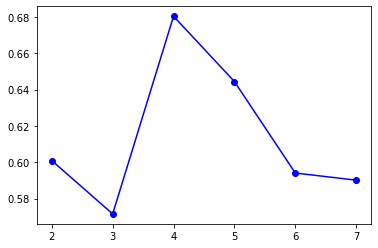

In [26]:
plt.plot(range(2, 8), scores, "bo-")

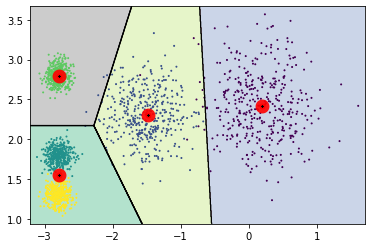

In [27]:
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(X)
plot(kmeans)

### heigst scores at k = 4 & k = 5 so try both

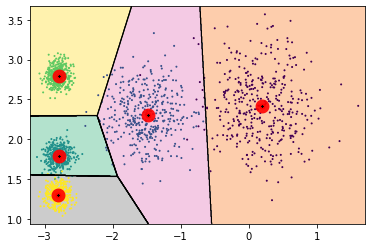

In [28]:
kmeans = KMeans(n_clusters=5, n_init=10)
kmeans.fit(X)
plot(kmeans)

# Segmentation using clustering of colors

In [29]:
from matplotlib.image import imread
image = imread("images/flower.jpeg")
image.shape

(667, 1000, 3)

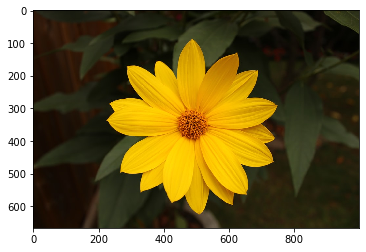

In [30]:
plt.imshow(image)

In [31]:
from sklearn.cluster import KMeans
# cluster/segment 5 colors
k = 3
segmentation_kmeans = KMeans(n_clusters=k, n_init=10)
# features are 3 values of the color(we cluster the colors so centers will be a color(3 values))
# and we compare each pixel color to its closest color center
X = image.reshape(-1, 3)
y = segmentation_kmeans.fit_predict(X)

In [32]:
y.shape

(667000,)

In [33]:
# replace each index with color
colors = [
    [255,0,0],
    [255,255,0],
    [255,0,255],
    [0,255,0],
    [0,0,255],
]

segment_y = np.zeros((y.shape[0],3))
print(segment_y.shape)
for i in range(k):
    segment_y[y == i] = colors[i]
segment_y = segment_y.reshape(image.shape)
segment_y.shape

(667000, 3)


(667, 1000, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


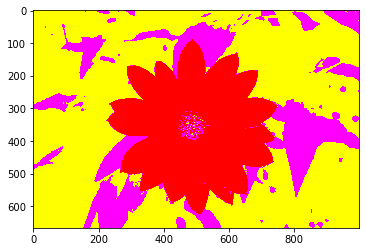

In [34]:
plt.imshow(segment_y)

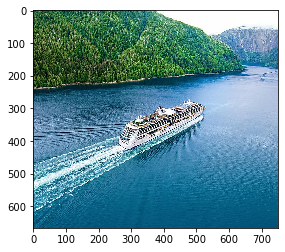

In [35]:
image = imread("images/ship.jpg")

plt.imshow(image)

In [36]:
# you should try different k clusters and select the one who segment better(visually, no need for score here)
segmentation_kmeans = KMeans(n_clusters=4, n_init=10)
X = image.reshape(-1, 3)
y = segmentation_kmeans.fit_predict(X)
y = y.reshape(image.shape[:2])

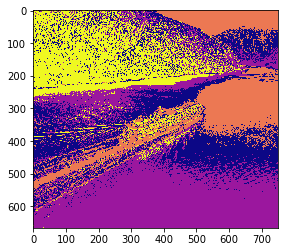

In [37]:
plt.imshow(y, cmap="plasma")

# Preprocessing & Dimentionality reduction using Clustering

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [39]:
dataset = load_digits()

In [40]:
X, y = dataset['data'], dataset['target']

In [41]:
# each sample is 8x8 image pixels
X.shape, y.shape, X[0], y[0]

((1797, 64),
 (1797,),
 array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]),
 0)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
logistic_regression = Pipeline([
    ("std", StandardScaler()),
    ("log", LogisticRegression(max_iter=1000))
])


In [43]:
logistic_regression.fit(X_train, y_train)

Pipeline(steps=[('std', StandardScaler()),
                ('log', LogisticRegression(max_iter=1000))])

In [44]:
logistic_regression.score(X_test, y_test)

0.9755555555555555

In [48]:
dim_reduction_regression = Pipeline([
    ("dim_reduction", KMeans(n_clusters=50)),
    ("log", LogisticRegression())
])


In [49]:
from sklearn.model_selection import GridSearchCV

params = {
# the prefix must = name_of_the_estimator_specified_in_pipeline + "__" + name of it's parameter
    "dim_reduction__n_clusters" : range(50,90)
}

grid_search = GridSearchCV(estimator=dim_reduction_regression, 
                           param_grid=params,
                           cv=3,
                           verbose=2)

In [50]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=50; total time=   2.3s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=50; total time=   2.3s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=50; total time=   2.2s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=51; total time=   2.8s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=51; total time=   2.2s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=51; total time=   2.3s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=52; total time=   2.6s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=52; total time=   2.5s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=52; total time=   2.6s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=53; total time=   2.8s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=53; total time=   2.7s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=53; total time=   2.5s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=54; total time=   2.6s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=54; total time=   3.0s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=54; total time=   2.7s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=55; total time=   2.5s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=55; total time=   2.5s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=55; total time=   2.4s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=56; total time=   2.5s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=56; total time=   2.6s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=56; total time=   2.5s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=57; total time=   5.1s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=57; total time=   5.2s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=57; total time=   5.4s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=58; total time=   5.2s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=58; total time=   5.1s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=58; total time=   5.2s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=59; total time=   4.9s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=59; total time=   5.4s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=59; total time=   5.3s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=60; total time=   5.4s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=60; total time=   4.5s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=60; total time=   4.4s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=61; total time=   4.6s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=61; total time=   5.0s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=61; total time=   5.5s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=62; total time=   5.7s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=62; total time=   4.6s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=62; total time=   6.1s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=63; total time=   4.7s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=63; total time=   4.4s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=63; total time=   5.5s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=64; total time=   5.3s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=64; total time=   5.1s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=64; total time=   5.5s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=65; total time=   5.6s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=65; total time=   4.8s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=65; total time=   5.5s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=66; total time=   4.8s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=66; total time=   4.3s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=66; total time=   4.9s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=67; total time=   4.7s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=67; total time=   4.8s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=67; total time=   4.7s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=68; total time=   4.4s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=68; total time=   4.8s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=68; total time=   5.6s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=69; total time=   5.1s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=69; total time=   5.0s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=69; total time=   5.3s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=70; total time=   5.4s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=70; total time=   5.0s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=70; total time=   5.6s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=71; total time=   4.5s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=71; total time=   5.9s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=71; total time=   5.4s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=72; total time=   4.3s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=72; total time=   4.8s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=72; total time=   5.8s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=73; total time=   5.8s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=73; total time=   4.9s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=73; total time=   5.3s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=74; total time=   4.5s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=74; total time=   4.9s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=74; total time=   5.0s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=75; total time=   5.1s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=75; total time=   5.1s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=75; total time=   4.3s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=76; total time=   4.2s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=76; total time=   4.8s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=76; total time=   4.2s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=77; total time=   3.6s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=77; total time=   4.5s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=77; total time=   5.0s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=78; total time=   5.7s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=78; total time=   5.4s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=78; total time=   5.6s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=79; total time=   5.1s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=79; total time=   5.2s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=79; total time=   4.3s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=80; total time=   4.9s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=80; total time=   5.1s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=80; total time=   4.6s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=81; total time=   6.1s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=81; total time=   4.8s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=81; total time=   4.4s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=82; total time=   5.4s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=82; total time=   6.0s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=82; total time=   5.9s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=83; total time=   5.2s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=83; total time=   5.1s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=83; total time=   5.8s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=84; total time=   5.2s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=84; total time=   5.5s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=84; total time=   6.2s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=85; total time=   4.9s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=85; total time=   5.3s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=85; total time=   6.0s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=86; total time=   5.2s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=86; total time=   5.5s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=86; total time=   6.0s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=87; total time=   5.4s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=87; total time=   4.1s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=87; total time=   5.3s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=88; total time=   4.6s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=88; total time=   4.4s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=88; total time=   3.9s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=89; total time=   5.3s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=89; total time=   4.6s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................dim_reduction__n_clusters=89; total time=   5.1s


/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('dim_reduction', KMeans(n_clusters=50)),
                                       ('log', LogisticRegression())]),
             param_grid={'dim_reduction__n_clusters': range(50, 90)},
             verbose=2)

In [51]:
grid_search.best_params_

{'dim_reduction__n_clusters': 55}

In [66]:
dim_reduction_regression = Pipeline([
    ("dim_reduction", KMeans(n_clusters=55)),
    ("log", LogisticRegression(max_iter=1000))
])
dim_reduction_regression.fit(X_train, y_train)

/home/amrelsersy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('dim_reduction', KMeans(n_clusters=55)),
                ('log', LogisticRegression(max_iter=1000))])

In [67]:
dim_reduction_regression.score(X_test, y_test) # better results !!

0.98

# Semi Supervised Learning
- Cluster all the data including supervised and unsupervised instances
- Find the k elements with minimum distance to the clusters's centers and consider them the labels of all other elements in the same cluster
- Propagate all other instances in each cluster with these labels elements
- Skip outliers (the instances that is far away from the cluster's center)
    - Calculate the distance to center for all train data and skip which is below a certain threshold

In [84]:
kmeans = KMeans(n_clusters=50, n_init=10, random_state=42)
distance_to_clusters = kmeans.fit_transform(X_train)

In [85]:
distance_to_clusters.shape, distance_to_clusters[0]

((1347, 50),
 array([48.44161434, 47.57922392, 35.86075525, 44.04711611, 40.5306484 ,
        45.219891  , 40.99034648, 45.09646725, 43.97566614, 33.430608  ,
        52.08476251, 43.96522616, 40.95303687, 47.47141097, 37.18007903,
        19.13677218, 48.24209387, 43.24691347, 50.22857908, 38.06396335,
        44.03997257, 49.8385393 , 43.95984695, 43.59202508, 43.17731994,
        50.48438225, 36.00394456, 41.53252481, 31.97490623, 39.280276  ,
        49.37204437, 51.64612764, 37.60052688, 48.8152071 , 41.39940096,
        48.10611549, 38.13341087, 43.19162037, 46.78790056, 46.39762542,
        45.39617023, 42.71419945, 30.69071521, 26.90977151, 45.73551852,
        43.04241629, 45.56966678, 35.93235611, 24.91892335, 43.05306163]))

In [89]:
min_distance_indices = np.argmin(distance_to_clusters,axis=0) 
min_distance_indices.shape

(50,)

In [90]:
y_min_distance_k_instances = y_train[min_distance_indices]

In [91]:
y_min_distance_k_instances

array([6, 9, 1, 7, 5, 9, 4, 2, 0, 8, 1, 4, 6, 6, 2, 8, 3, 3, 4, 7, 9, 7,
       5, 5, 2, 1, 5, 2, 2, 8, 1, 9, 7, 4, 0, 6, 8, 7, 5, 6, 3, 0, 3, 1,
       6, 2, 4, 5, 1, 3])

In [92]:
k = 50
y_semi_supervised = np.empty(len(y_train), np.int32)
for i in range(k):
    y_semi_supervised[kmeans.labels_ == i] = y_min_distance_k_instances[i]

In [95]:
y_semi_supervised[:20]

array([8, 9, 5, 5, 3, 0, 8, 5, 5, 9, 8, 0, 1, 1, 6, 8, 7, 7, 0, 0],
      dtype=int32)

In [96]:
y_train[:20] # Very similar !!! from just 50 labeled elements

array([8, 9, 5, 5, 3, 0, 8, 5, 9, 9, 2, 0, 1, 1, 6, 1, 7, 7, 0, 0])

In [113]:
# To filter the instances based on how close to the center use np.percentile

max_percent = 50 # 50 %
max_distances_cluster = []

for i in range(k):
    # this is wrong !, refer to the book page 255
    distance_to_one_cluster = distance_to_clusters[kmeans.labels_ == i]
    max_distance = np.percentile(distance_to_one_cluster, max_percent)
    max_distances_cluster.append(max_distance)
    # then filter them
    
max_distances_cluster[:10]

[46.769755535843466,
 46.56115760458758,
 44.49047276685598,
 46.94993948979777,
 43.937358656717976,
 45.446973273780216,
 45.910544267239885,
 44.89950685687717,
 45.3380500438506,
 40.90751899999683]

In [101]:
np.arange(len(X_train))

array([   0,    1,    2, ..., 1344, 1345, 1346])

# DBSCAN Clustering
- For each instance, the algorithm counts how many instances are located within a
small distance ε (epsilon) from it. This region is called the instance’s εneighborhood.

- If an instance has at least min_samples instances in its ε-neighborhood (includ‐
ing itself), then it is considered a core instance. In other words, core instances are
those that are located in dense regions.

- All instances in the neighborhood of a core instance belong to the same cluster.
This may include other core instances, therefore a long sequence of neighboring
core instances forms a single cluster.

- Any instance that is not a core instance and does not have one in its neighbor‐
hood is considered an anomaly.

In [114]:
from sklearn.datasets import make_moons

In [150]:
X, y = make_moons(n_samples=1000, noise=0.05)

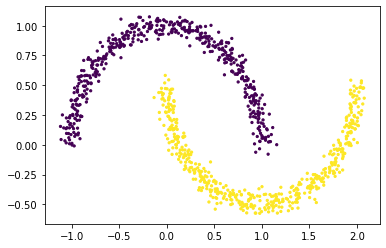

In [151]:
plt.scatter(X[:,0],X[:,1], s=5, c=y)

In [160]:
from sklearn.cluster import DBSCAN

In [172]:
dbscan_clustering = DBSCAN(eps=0.05, min_samples=5)

In [173]:
dbscan_clustering.fit(X)

DBSCAN(eps=0.05)

In [174]:
# -1 is outliers
# numbers represents clusters ids (and new labels generated by the clustering to be used in classification)
dbscan_clustering.labels_

array([ 0,  1, -1,  2,  0, -1,  3,  1,  4, -1,  2,  2,  3,  4,  5,  5,  2,
       -1,  1,  5,  1,  2,  2,  3,  3,  3,  1,  4,  1,  5,  3,  1,  5,  1,
       -1,  5,  4,  5,  2,  2,  5,  0,  1,  4,  1,  0,  5,  1,  5,  1, -1,
        5,  5,  1,  5,  1,  2,  5,  2,  0,  5,  1,  5,  2,  4,  2,  1,  5,
        1,  5,  2,  1,  3,  2,  2,  5,  2,  2,  5,  2,  5,  5,  1,  1,  3,
        2,  2,  2,  5,  5,  5, -1,  1,  1,  1,  2,  3, -1,  0, -1,  0,  1,
        2,  2,  1,  5,  2,  0,  5,  1,  2,  1, -1,  1,  1,  2,  0,  3,  4,
        2,  1,  2,  5,  5,  1,  1,  3,  5,  5,  1,  2,  1,  3,  2,  4, -1,
        5,  5,  1, -1, -1,  1,  2,  0,  5, -1, -1,  1,  5,  1,  2,  1, -1,
        5,  1,  1,  6,  5,  1,  1,  1,  1,  1,  5,  5,  5,  2,  3,  5,  2,
        2,  2, -1,  2,  3,  2,  2,  5,  4,  3,  1, -1,  2,  4,  1,  1,  1,
        0,  5,  0,  5,  5,  1,  5,  2,  5,  1,  2,  5,  1,  5,  4,  1,  5,
        0,  2,  2,  5,  2,  5,  1,  3,  1,  1,  3,  2, -1,  2,  2,  4,  2,
        2,  2,  0,  1,  1

In [175]:
# not outliers instances
dbscan_clustering.components_

array([[ 2.03820299,  0.48650979],
       [ 0.06963883,  0.27092352],
       [-0.9368299 ,  0.28320015],
       ...,
       [ 1.29687317, -0.51357724],
       [ 0.32459154,  0.97273292],
       [-0.86385766,  0.45236944]])

In [176]:
# components indices
dbscan_clustering.core_sample_indices_

array([  0,   1,   3,   4,   6,   7,   8,  10,  11,  12,  13,  14,  15,
        18,  19,  22,  23,  24,  25,  27,  28,  29,  31,  33,  35,  36,
        37,  38,  39,  40,  41,  42,  43,  45,  46,  47,  48,  49,  51,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  72,  75,  76,  77,  78,  79,  81,  82,  83,  84,  86,  87,
        89,  90,  92,  93,  94,  95,  96,  98, 100, 101, 102, 103, 104,
       105, 106, 108, 109, 110, 111, 113, 114, 115, 116, 117, 119, 120,
       121, 122, 123, 124, 127, 128, 129, 130, 131, 132, 133, 134, 136,
       137, 138, 141, 142, 143, 144, 147, 148, 149, 151, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 164, 165, 166, 169, 170, 171,
       173, 174, 175, 176, 177, 179, 180, 182, 183, 185, 186, 187, 188,
       189, 190, 191, 192, 193, 194, 195, 197, 198, 199, 200, 201, 202,
       203, 204, 205, 206, 207, 208, 209, 211, 212, 213, 214, 215, 217,
       218, 219, 220, 221, 222, 223, 225, 230, 231, 232, 233, 23

In [179]:
len(dbscan_clustering.core_sample_indices_), len(dbscan_clustering.labels_) # out of 1000 samples

(801, 1000)

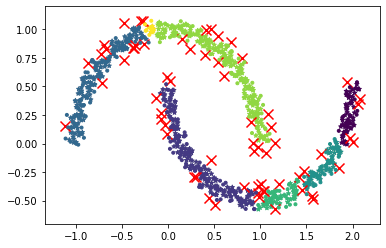

In [182]:
def plot_dbscan(dbscan, X,show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=5, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    
plot_dbscan(dbscan_clustering, X)
# bad ! 7 clusters, so increase the epsilon to combine clusters together

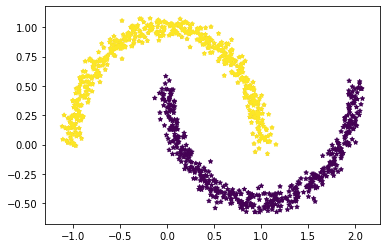

In [199]:
dbscan_clustering = DBSCAN(eps=0.2, min_samples=10)
dbscan_clustering.fit(X)
plot_dbscan(dbscan_clustering, X)
# Perfect !

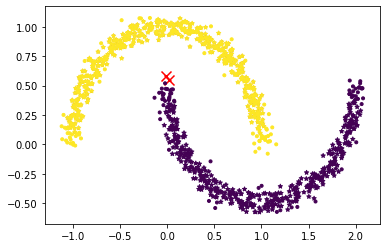

In [212]:
# We shouldn't increase epsilon too much not to combine the big clusters together
# Also we can increase min_samples to detect more outliers
# (as you will not consider it not outlier till it is surounded by min_samples instances)
dbscan_clustering = DBSCAN(eps=0.2, min_samples=50)
dbscan_clustering.fit(X)
plot_dbscan(dbscan_clustering, X)

# K Nearest Neigbours
- Classification of dbscan clustering results
- dbscan dosn't have predict function, so we do classification based on dbscan **labels**
- Provides calculating of k elements which are closest to the instance (usefull in detecting **outliers**)

In [216]:
from sklearn.neighbors import KNeighborsClassifier
kneighbors = KNeighborsClassifier()

In [217]:
not_outlier = dbscan_clustering.core_sample_indices_
kneighbors.fit(X=X[not_outlier], 
               y=dbscan_clustering.labels_[not_outlier])

KNeighborsClassifier()

In [222]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
kneighbors.predict(X_new)

array([1, 0, 1, 0])

In [223]:
kneighbors.predict_proba(X_new)

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

## Outliers detection from neighbors
To detect whether the instance is outlier(anomaly) or not
- get its nearst neighbor
- you will get closest distance, and the index(from core_indices) of that neighbor
- compare it to a certain threshold

In [225]:
y_knn_distance, y_knn_index = kneighbors.kneighbors(X_new, n_neighbors=1)

In [226]:
y_knn_distance, y_knn_index

(array([[0.45885147],
        [0.15735145],
        [0.1966946 ],
        [0.64623438]]),
 array([[ 63],
        [247],
        [823],
        [ 50]]))

In [227]:
is_outlier = y_knn_distance > 0.2

In [228]:
is_outlier

array([[ True],
       [False],
       [False],
       [ True]])

In [229]:
y_pred = dbscan_clustering.labels_[dbscan_clustering.core_sample_indices_][y_knn_index]

In [232]:
y_pred[is_outlier] = -1

In [233]:
y_pred

array([[-1],
       [ 0],
       [ 1],
       [-1]])

# Gaussian Mixture
- Similar to KMeans but instead of having just centers, we have mean, variance to each center
- Usefull for non-spherical data features
- Instead of silhouette score, compute AIC (gm.aic) for different values of k that minimize AIC

In [246]:
from matplotlib.colors import LogNorm
def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
from sklearn.mixture import BayesianGaussianMixture, GaussianMixture

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [247]:
k = 3
gm = GaussianMixture(n_components=k, n_init=10)

In [248]:
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

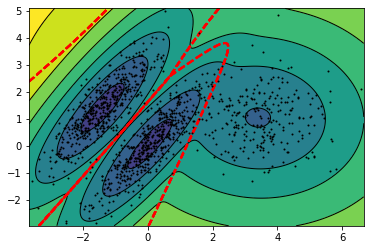

In [249]:
plot_gaussian_mixture(gm, X)

# Types
- "full" (default): no constraint, all clusters can take on any ellipsoidal shape of any size.
- "tied": all clusters must have the same shape, which can be any ellipsoid (i.e., they all share the same covariance matrix).
- "spherical": all clusters must be spherical, but they can have different diameters (i.e., different variances).
- "diag": clusters can take on any ellipsoidal shape of any size, but the ellipsoid's axes must be parallel to the axes (i.e., the covariance matrices must be diagonal).

In [250]:
gm.weights_

array([0.4000662 , 0.20965228, 0.39028152])

In [251]:
gm.means_ # centers

array([[-1.40763984,  1.42710194],
       [ 3.39909717,  1.05933727],
       [ 0.05135313,  0.07524095]])

In [252]:
gm.covariances_ # std variance

array([[[ 0.63478101,  0.72969804],
        [ 0.72969804,  1.1609872 ]],

       [[ 1.14807234, -0.03270354],
        [-0.03270354,  0.95496237]],

       [[ 0.68809572,  0.79608475],
        [ 0.79608475,  1.21234145]]])

In [261]:
# to detect outliers
denisty = gm.score_samples(X)
density_threshold = np.percentile(denisty, 4) # 4% of the density
anomalies = X[denisty < density_threshold]
print(density_threshold)
anomalies.shape, anomalies

-5.487282174198532


((50, 2),
 array([[-0.11118987,  1.61334992],
        [ 0.62362922,  4.41540435],
        [ 1.49808977, -0.15251688],
        [ 0.74219223, -1.00445177],
        [-2.53940854, -2.76549965],
        [-1.62447969, -0.45770022],
        [-1.74680316, -0.78385111],
        [-3.58308316, -1.28249917],
        [ 0.53903026,  5.00244257],
        [-0.51480414, -2.16270124],
        [-1.81015204, -0.58926015],
        [-1.79651788, -0.97031471],
        [-2.11225785, -2.09712817],
        [-3.39408574, -2.28378778],
        [ 1.58082729,  4.20122873],
        [-2.48037945, -1.18651064],
        [-2.93972237, -1.41660564],
        [-1.62285961, -2.84860478],
        [-0.25954463, -1.7743691 ],
        [ 0.46018217,  2.78323717],
        [-2.06317379,  2.2670332 ],
        [ 0.13982849,  2.08023553],
        [-2.54004484, -2.8290338 ],
        [-1.93037427, -1.19447352],
        [-0.27124433, -1.86750177],
        [-1.15568262, -2.57480367],
        [-1.93315582,  2.49030105],
        [ 4.932075

# Bayesian Guassian Mixture
- Instead of computing AIC for different k clusters and select k manually
- specify a **big-enough** number of clusters and Bayesian GM will assign a **weight** for each cluster
- some of the unneeded clusters will be canceled (weight = 0) automatically

In [262]:
from sklearn.mixture import BayesianGaussianMixture

enough_k = 10 # some of them will be canceled
bgm = BayesianGaussianMixture(n_components= enough_k, n_init=10)
bgm.fit(X)

BayesianGaussianMixture(n_components=10, n_init=10)

In [265]:
np.round(bgm.weights_,2) # just first 3 has non-zero weights ! 

array([0.21, 0.39, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [269]:
bgm.predict(np.array([[1.3,0.5]]))

array([1])

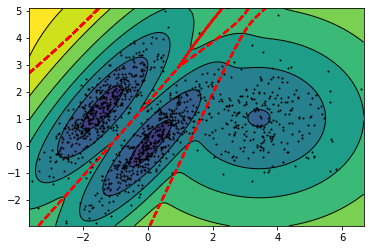

In [270]:
plot_gaussian_mixture(bgm, X)